In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters


In [11]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df.date = pd.to_datetime(df.date)
df.sample(5)

,date,value
844,2018-08-31,77834
222,2016-12-17,23503
545,2017-11-05,43411
306,2017-03-11,25319
786,2018-07-04,63630


In [12]:
print(df['value'].quantile(0.975))
print(df['value'].quantile(0.025))

177613.075
17876.4


In [13]:
df = df[(df['value'] <= df['value'].quantile(0.975)) & (df['value'] >= df['value'].quantile(0.025))]

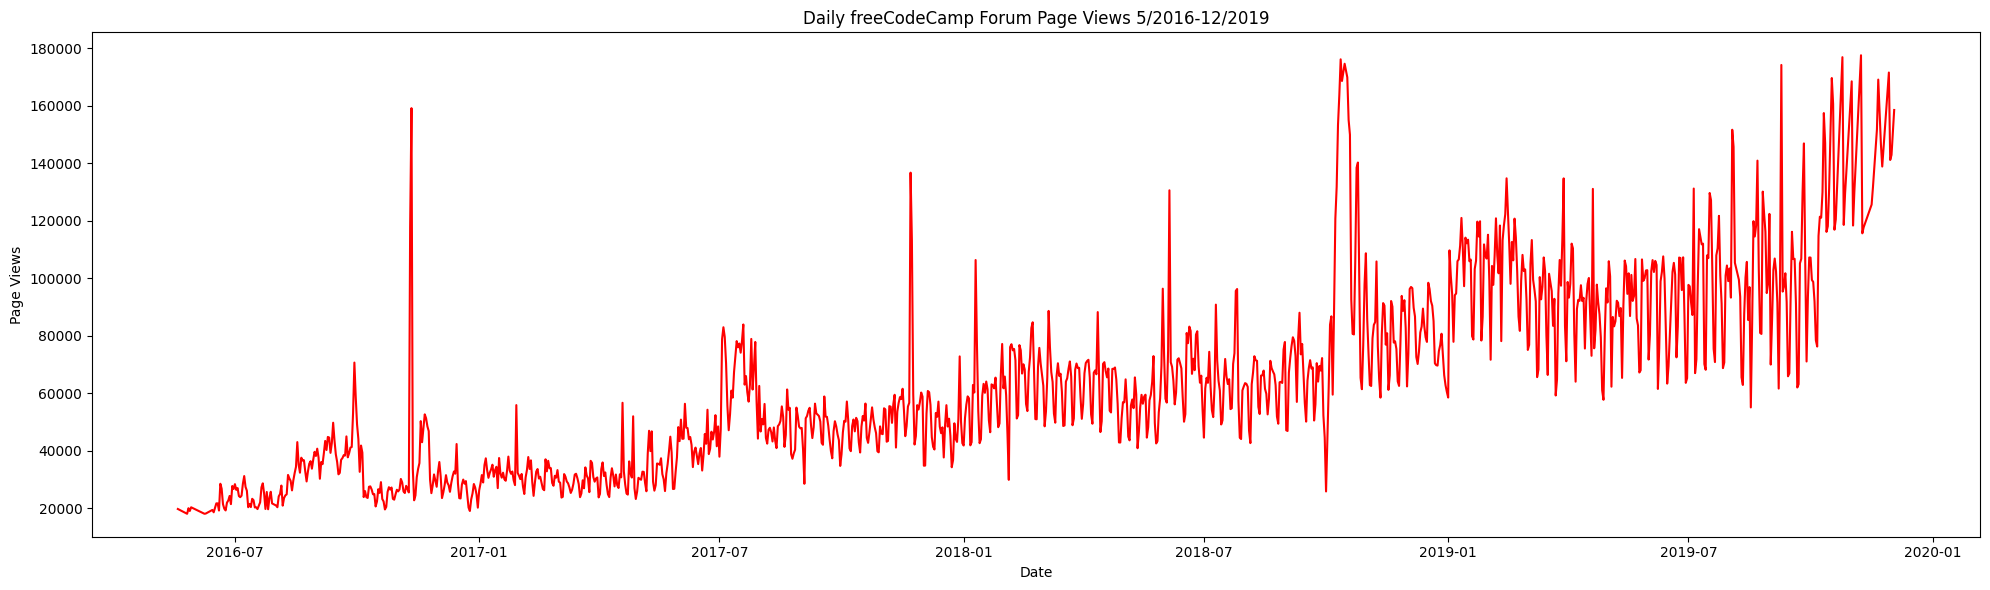

In [14]:
plt.figure(figsize=(20, 6))
plt.plot(df['date'], df['value'], color='red')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.tight_layout()
plt.show()

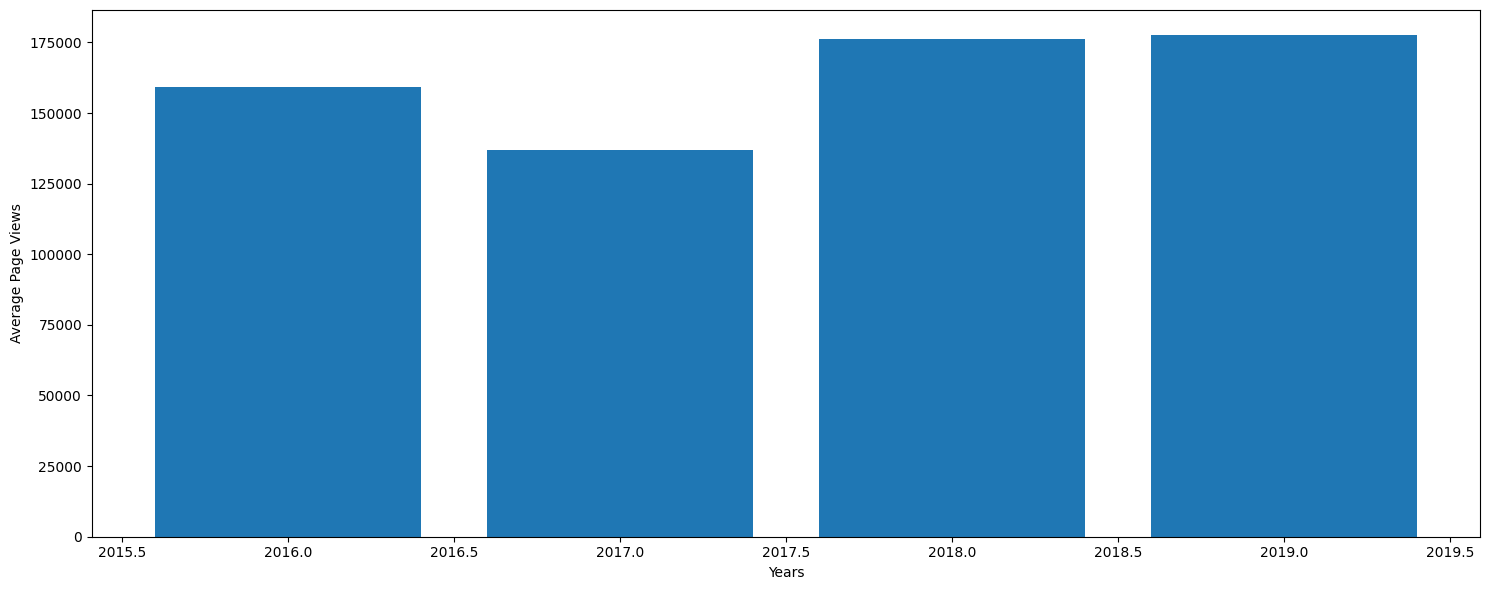

In [6]:
plt.figure(figsize=(15, 6))
plt.bar((df['date'].dt.year), df['value'],data=df['date'].dt.month_name())
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.tight_layout()
plt.show()

In [26]:
df_bar=df.copy()
df_bar['month'] = pd.DatetimeIndex(df_bar['date']).month
df_bar['year'] = pd.DatetimeIndex(df_bar['date']).year

df_bar = df_bar.groupby(['year', 'month'])['value'].mean()
df_bar=df_bar.unstack()
df_bar.columns = ["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"]
df_bar

,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


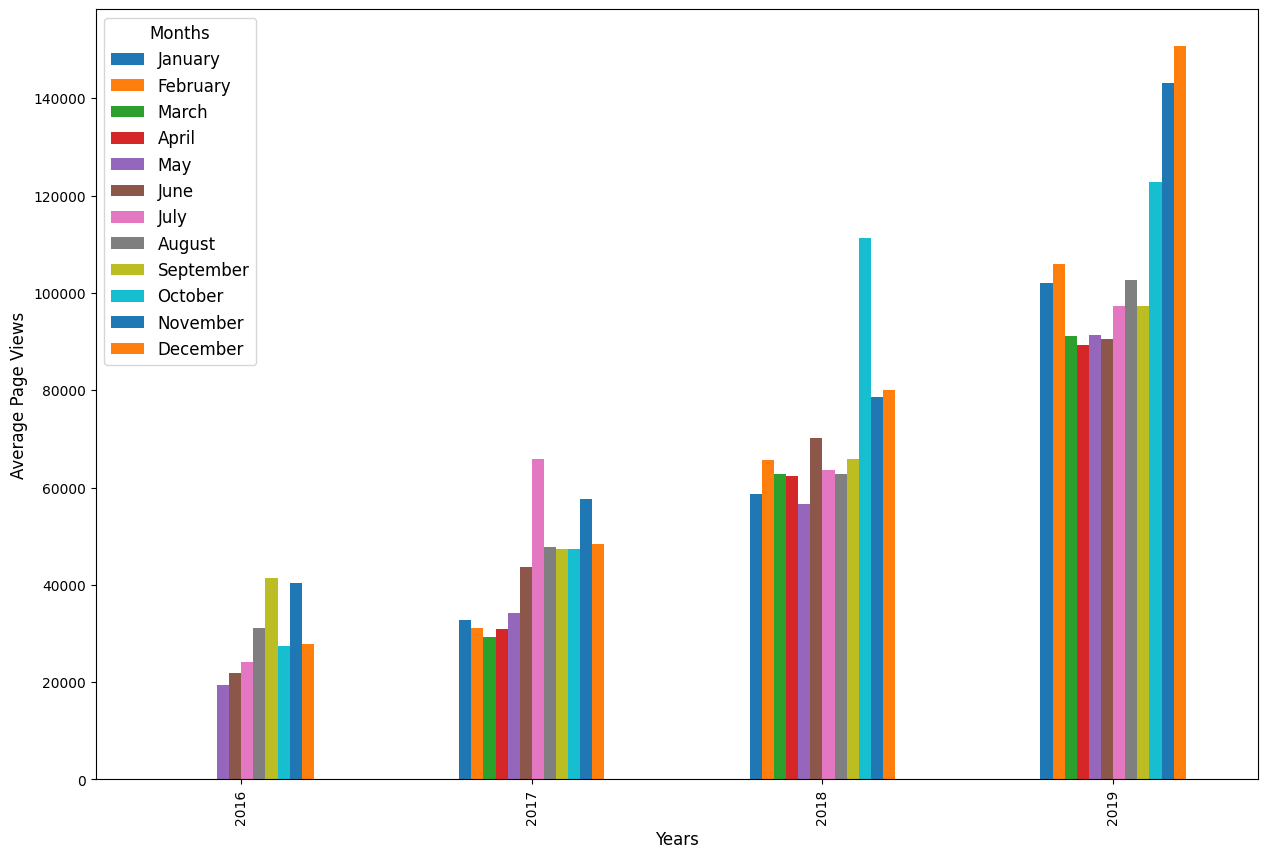

In [27]:
fig=df_bar.plot(kind='bar', figsize=(15, 10)).figure
plt.xlabel('Years',fontsize=12)
plt.ylabel('Average Page Views',fontsize=12)
plt.legend(loc='upper left',title='Months',title_fontsize='12',fontsize='12')

In [8]:
df2.groupby(['year','month'])['value'].mean().unstack()

NameError: name 'df2' is not defined

C:\Users\jaime\AppData\Local\Temp\ipykernel_26872\2796792773.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_bar, x='year', y = 'value', hue='month',estimator=np.mean, ci=None,palette='tab10').set_ylim(0, 160000)


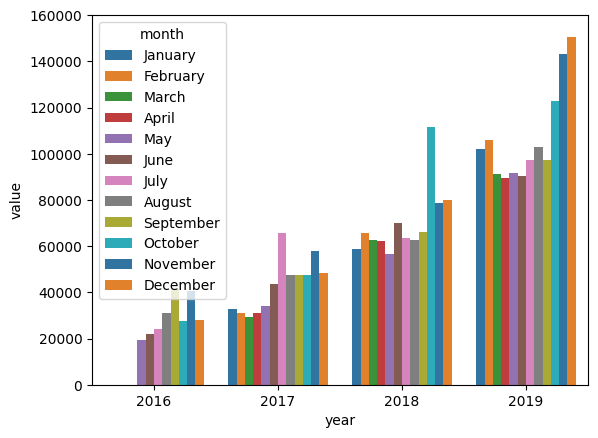

In [9]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df_bar['month'] = pd.Categorical(df_bar['month'], categories=months, ordered=True)
sns.barplot(data=df_bar, x='year', y = 'value', hue='month',estimator=np.mean, ci=None,palette='tab10').set_ylim(0, 160000)
plt.show()

In [ ]:
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    df_box.sample(9)

,index,date,value,year,month
643,675,2018-03-15,66800,2018,Mar
1231,1291,2019-11-21,169121,2019,Nov
563,595,2017-12-25,49542,2017,Dec
641,673,2018-03-13,70428,2018,Mar
677,709,2018-04-18,67661,2018,Apr
1050,1085,2019-04-29,80832,2019,Apr
873,908,2018-11-03,62830,2018,Nov
167,199,2016-11-24,46822,2016,Nov
9,37,2016-06-15,18584,2016,Jun


C:\Users\jaime\AppData\Local\Temp\ipykernel_14812\688225279.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x='year', y='value',palette='tab10')
C:\Users\jaime\AppData\Local\Temp\ipykernel_14812\688225279.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x='month', y='value',order=month,palette='tab10').set_ylim(0, 200000)


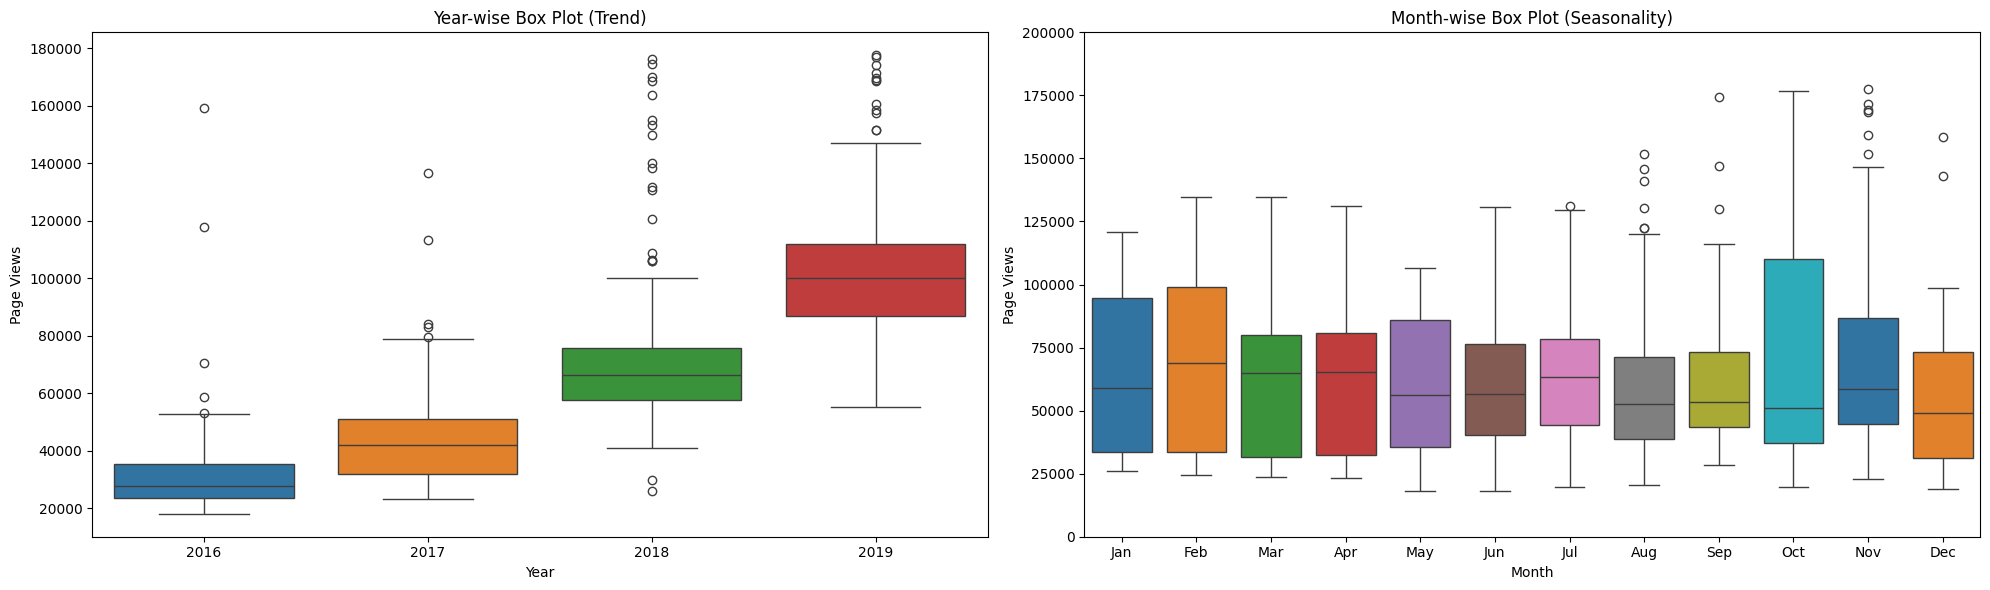

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.boxplot(data=df_box, x='year', y='value',palette='tab10')
plt.title('Year-wise Box Plot (Trend)')
plt.xlabel('Year')
plt.ylabel('Page Views')
plt.subplot(1,2,2)
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(data=df_box, x='month', y='value',order=month,palette='tab10').set_ylim(0, 200000)
plt.title('Month-wise Box Plot (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Page Views')
plt.tight_layout()

fig=plt.lgc()
plt.show()

c:\Users\jaime\OneDrive\Escritorio\CodeCamp\page_views\time_series_visualizer.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_bar, x='year', y = 'value', hue='month',estimator=np.mean,ci=None,palette='tab10').set_ylim(0, 160000)


Years


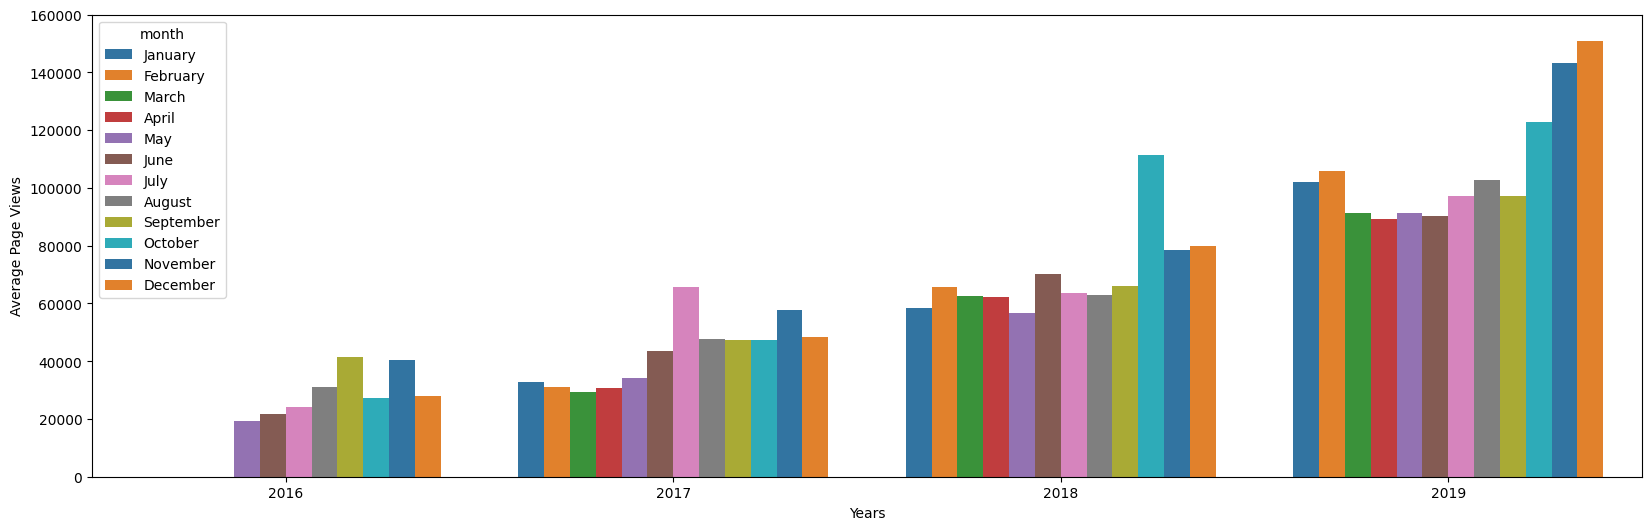

In [10]:
import time_series_visualizer   
fig = time_series_visualizer.draw_bar_plot()
ax = fig.axes[0]
print(ax.get_xlabel())

C:\Users\jaime\AppData\Local\Temp\ipykernel_14812\3774855567.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.catplot(data=df2, x='year', y = 'value', hue='month',estimator=np.mean, ci=None,palette='tab10',kind='bar')
c:\Users\jaime\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


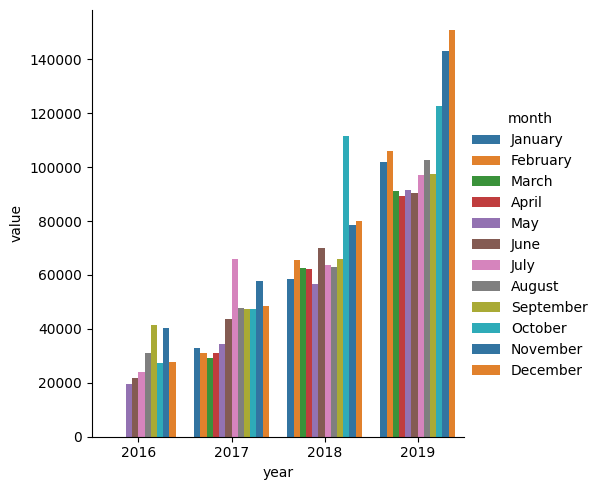

In [ ]:

ax=sns.catplot(data=df2, x='year', y = 'value', hue='month',estimator=np.mean, ci=None,palette='tab10',kind='bar')
plt.show()

In [ ]:
  import matplotlib as mpl
  len([rect for rect in ax.get_children() if isinstance(rect, mpl.patches.Rectangle)])

TypeError: 'FacetGrid' object is not subscriptable